<a href="https://colab.research.google.com/github/HAN-GEONHUI/test/blob/t_academy_%EC%88%98%EC%97%85/24_%EC%B5%9C%EB%8B%A8%EA%B1%B0%EB%A6%AC_%EC%B9%B4%EC%B9%B4%EC%98%A4(240821).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ref: https://school.programmers.co.kr/learn/courses/30/lessons/72413?language=python3
# ==> 택시 합승 요금 문제

In [ ]:
# 지도상에서 최단거리 문제와 유사한 세팅!!
# ==> 거리가 "요금" 변경!!
# ==> 출발점에서 최소거리만 구하면 되는데,,
#     같이 타고오는 구간 + 따로따로가는 구간!!!
#     : 뭔가 파트가 나눠져서 해야하는구나!!!!!!!!
#     (출발부터 따로 가는게 저렴하면, 합승 안 해도 됨!)


In [ ]:
# 입력 처리 : [4,1,2] <--> [4,1,2]. [1,4,2]
graph[
    [],
    [(4,2)],
    []
    [(1,2)]
]

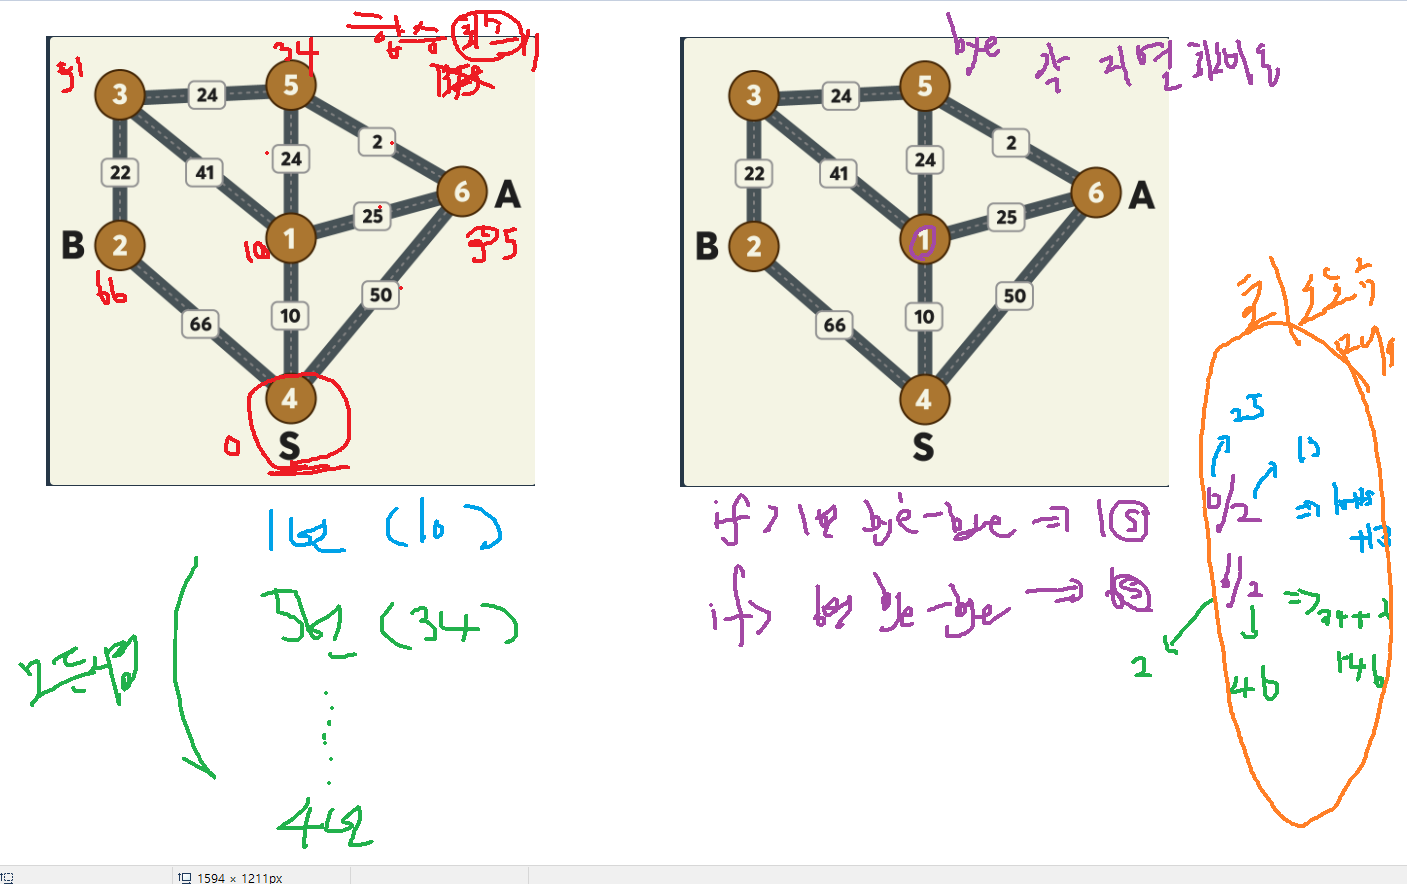

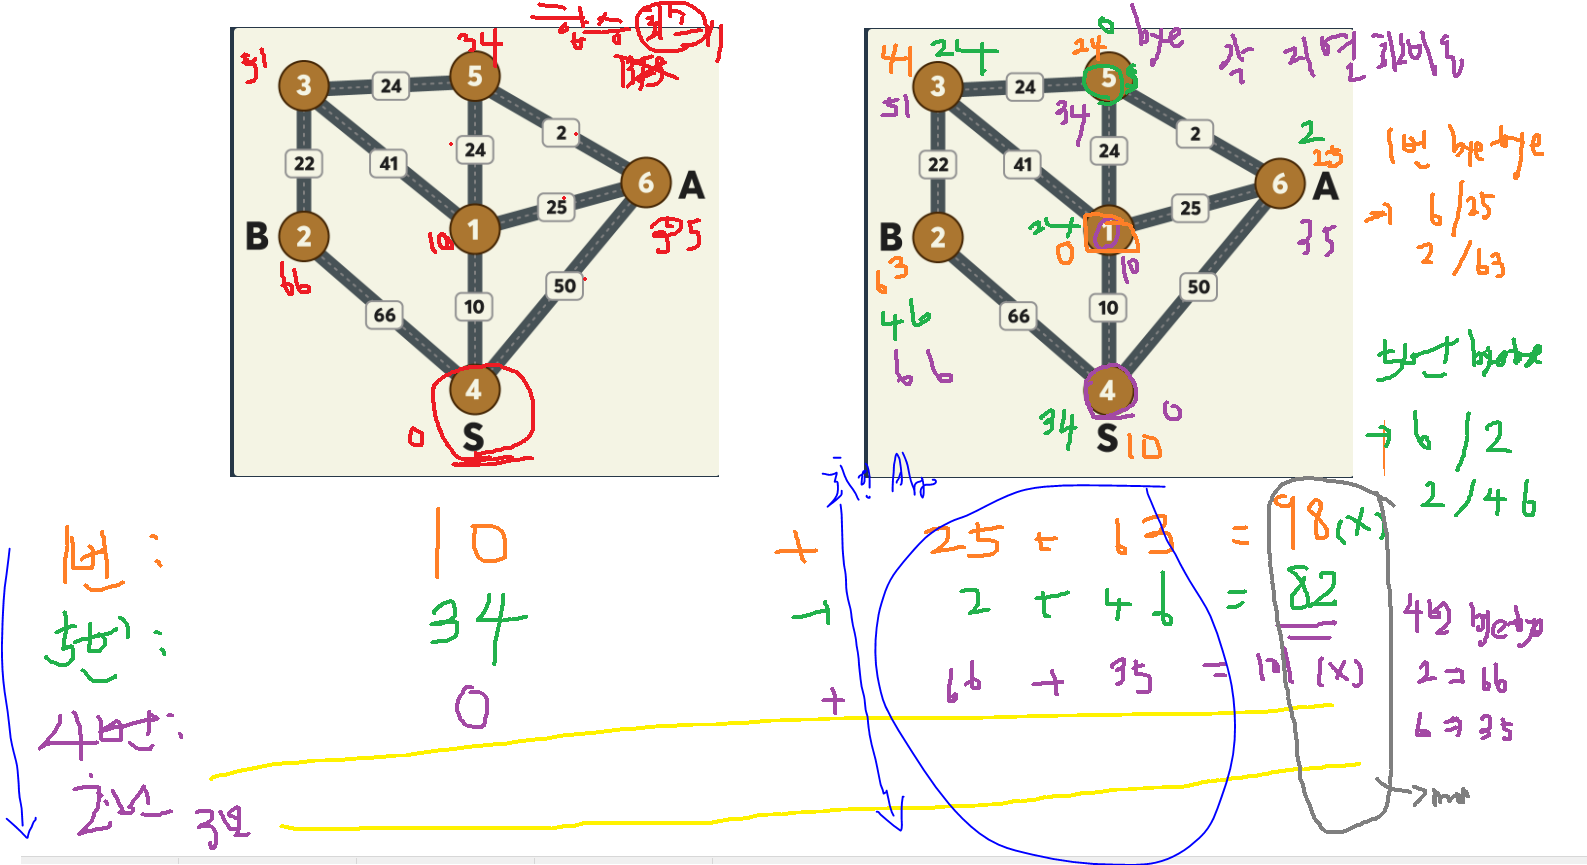

In [ ]:
#최대한 공통 최단거리 탐색으로 처리!(합승 요금/헤어져서 각자 집 요금)
#       함수:지도//출발점//각 지점별 최소거리 계산결과
#    --> 다익스트라알고리즘 구현

In [ ]:
# 큰 접근 방향
# Step1) 지도 처리 해야하고
# Step2) s에 대한 출발점에 대한 입력정보를 바탕으로 --> 각 지점별 최소요금 계산
#        [ 위의 그림 상 왼쪽 그림에 대한 각 도시별 최소요금 ]
# step3) 모든 도시에서 bye-bye를 할 수 있으니, 다 체크!!!!
#         => 그 도시에서 bye-bye에 대한 a/b까지의 최소 요금 계산
#        --> i번째 도시에서 bye-bye를 한다면..
#            i번째 도시를 출발해서 --> 모든 지점상 최소요금을 계산!
#            [위의 긂 상 오른쪼 그림에 대한 각 색상별 요금 계산]
#            -- i번째에서 bye-bye 전체 요금 계산
#            (요금= 왼쪽 상 요금[1개]+오른쪽 상 요금[2개])
#             이중에서 최소 요금을 모니터링
#--> 남은 최소 요금을 return : 출력

#출발점에 대한 각 지점별 최소요금을  구하는(알고리즘)일 계속 반복
#각 각 하는 일이 동일하니 함수로 구조화를 하자


In [ ]:
#먼저 필요한  패키지에 대한 설정
import heapq
#필요한 값에 대한 설정:INF
INF = float("inf")

In [ ]:
def solution(n, s, a, b, fares):
    answer = 0
    ###############################################
    #1) 입력부분을 처리!
    #1-1) 지도,거리::도시 번호가 자연수--> 0번의 가상도시
    #                                      why?list로 코드화해야 하기 때문에--> 정수 인덱스:도시번호
    #               : 표현 방식:인접리스트 방식--> 파이썬 리스트로 코드
    graph = [[]for _ in range(n+1)]
    distance = [ INF for _ in range(n+1)]

    # 1-2) 지도 내의 도로와 연결에 대한 정보처리!!!!
    # 입력변수 ; fares ---> 도시1, 도시2, 둘 사이 요금
    # ==> 주의!! 출발, 도착이 아니고, 양방향!!!==> 정보도 양쪽에 기록!!!!!
    for fare in fares: # fare ==> 도시1, 도시2, 요금
        # 양방향으로 수성!!!!
        # 도시1출발[graph_정수인덱스], 도시2도착, 요금
        # 도시2출발[graph_정수인덱스], 도시1도착, 요금
        s_node, e_node, f = fare # fare[0], fare[1], fare[2] :
        graph[s_node].append( (e_node, f) )
        graph[e_node].append( (s_node, f) )
    print(graph)
    ###############################################3
    return graph


In [ ]:
n=6
s=4
a=6
b=2
fares = [[4, 1, 10], [3, 5, 24], [5, 6, 2], [3, 1, 41], [5, 1, 24], [4, 6, 50], [2, 4, 66], [2, 3, 22], [1, 6, 25]]
temp = solution(n, s, a, b, fares)

[[], [(4, 10), (3, 41), (5, 24), (6, 25)], [(4, 66), (3, 22)], [(5, 24), (1, 41), (2, 22)], [(1, 10), (6, 50), (2, 66)], [(3, 24), (6, 2), (1, 24)], [(5, 2), (4, 50), (1, 25)]]


In [ ]:
temp # --> 1번 케이스에 대한 지도를 코드화!!

[[],
 [(4, 10), (3, 41), (5, 24), (6, 25)],
 [(4, 66), (3, 22)],
 [(5, 24), (1, 41), (2, 22)],
 [(1, 10), (6, 50), (2, 66)],
 [(3, 24), (6, 2), (1, 24)],
 [(5, 2), (4, 50), (1, 25)]]

In [ ]:
def solution(n, s, a, b, fares):
    answer = 0
    ###############################################
    # 1) 입력부분을 처리!!
    # 1-1) 지도, 거리 : 도시번호가 자연수 --> 0번 가상도시 , 1~n까지 사용
    #                                         why? 리스트로 코드화!!!--> 정수인덱스:도시번호
    #                 : 표현 방식 :인접리스트방식 --> 파이썬 리스트로 코드화!!
    graph = [ [] for _ in range(n+1)]
    distance = [ INF for _ in range(n+1)]

    # 1-2) 지도 내의 도로와 연결에 대한 정보처리!!!!
    # 입력변수 ; fares ---> 도시1, 도시2, 둘 사이 요금
    # ==> 주의!! 출발, 도착이 아니고, 양방향!!!==> 정보도 양쪽에 기록!!!!!
    for fare in fares: # fare ==> 도시1, 도시2, 요금
        # 양방향으로 수성!!!!
        # 도시1출발[graph_정수인덱스], 도시2도착, 요금
        # 도시2출발[graph_정수인덱스], 도시1도착, 요금
        s_node, e_node, f = fare # fare[0], fare[1], fare[2] :
        graph[s_node].append( (e_node, f) )
        graph[e_node].append( (s_node, f) )
    #print(graph)
    # 입력처리 끝 :-----------------------------------------------------
    #step2) 주어진 입력s에서 출발 할 떼, 모든,도시에 이르는 최소요금 계산@
          #--> 최단거리 알고리즘: 다익스트르라알고리즘 --> 함수콜

    # step3) 각 지점에서 환승을 끝내고 각자의 집으로 갈 때 : 오른쪽 그림
    #       ==> 각 지점을 돌아가면서
    #               : 그 지점을 출발점으로 모든 도시에 이르는 최소요금 계산!!!
    #                 --> 앞에서 만든거와 동일한 다익스트라알고리즘 함수 콜
    #               : 그 출발점 == 거기까지 합승 + 각 집으로 가는 요금 --> 전체요금계산
    #                 --> 최소 요금에 대한 모니터링!!!
    #


    return answer

In [ ]:
#위에꺼를 조금 더 변형

In [ ]:


def solution(n, s, a, b, fares):
    answer = 0
    ###############################################
    # 1) 입력부분을 처리!!
    # 1-1) 지도, 거리 : 도시번호가 자연수 --> 0번 가상도시 , 1~n까지 사용
    #                                         why? 리스트로 코드화!!!--> 정수인덱스:도시번호
    #                 : 표현 방식 :인접리스트방식 --> 파이썬 리스트로 코드화!!
    graph = [ [] for _ in range(n+1)]
    distance = [ INF for _ in range(n+1)]

    # 1-2) 지도 내의 도로와 연결에 대한 정보처리!!!!
    # 입력변수 ; fares ---> 도시1, 도시2, 둘 사이 요금
    # ==> 주의!! 출발, 도착이 아니고, 양방향!!!==> 정보도 양쪽에 기록!!!!!
    for fare in fares: # fare ==> 도시1, 도시2, 요금
        # 양방향으로 수성!!!!
        # 도시1출발[graph_정수인덱스], 도시2도착, 요금
        # 도시2출발[graph_정수인덱스], 도시1도착, 요금
        s_node, e_node, f = fare # fare[0], fare[1], fare[2] :
        graph[s_node].append( (e_node, f) )
        graph[e_node].append( (s_node, f) )
    #print(graph)
    # 입력처리 끝 :-----------------------------------------------------
    # step2) 주어진 입력 s에서 출발할 때, 모든 도시에 이르는 최소요금 계산!!!
    #        ==> 최단거리 알고리즘 : 다익스트라알고리즘 --> 함수콜
    distance = dijkstra(s,distance, graph)
    # ==> distance에 대해서 일단 무한대의 요금이라는 것을 주고, 채워주기를 원하는것!!
    # ==> 위의 그림 상 왼쪽 요금표

    # step3) 각 지점에서 환승을 끝내고 각자의 집으로 갈 때 : 오른쪽 그림
    #       ==> 각 지점을 돌아가면서
    #               : 그 지점을 출발점으로 모든 도시에 이르는 최소요금 계산!!!
    #                 --> 앞에서 만든거와 동일한 다익스트라알고리즘 함수 콜
    #               : 그 출발점 == 거기까지 합승 + 각 집으로 가는 요금 --> 전체요금계산
    #                 --> 최소 요금에 대한 모니터링!!!
    min_fare = INF
    for start_node in range(1,n+1):
        # 모든 n개의 도시들을 출발점으로 해서,,,각 도시별로 최소요금 계산!!!
        # ==> 위의 오른쪽 그림에 대한 여러 색의 요금
        # : 그 지점에서 서로 bye-bye 하고, 각 집으로 갈 때 필요한 요금
        dist = [ INF for _ in range(n+1)]
        dist = dijkstra(start_node, dist, graph)
        cost = distance[start_node] + dist[a] + dist[b]
        min_fare = min(min_fare,cost) # 기존보다 더 저렴한 가격이 나오면 갱신! -->if,,,,,,여러 방법 : min함수
    answer = min_fare
    return answer

In [ ]:
# 실제 시작점에서 전체 도시들까지의 최소요금을 계산해주는 함수!!!
# 입력 : 출발점, 요금에 대한 기록지, 지도
# 출력 : 출발점에서 각 도시별로 최소요금이 기록된 기록지!!!!
# --> 구체적인 세팅은 본인 원하시는대로 세팅하시면 됨!!!
# 할 일 : 출발점부터 최소요금을 찾아서 기록하기!!! ==> 다익스트라알고리즘!!
def dijkstra(start,distance, graph):
    # 일단 필요한 우선순위 큐
    q = []
    # 시작점에 대해서 처리 : 거리값0세팅, 큐에 넣는 :도장&할일추가
    heapq.heappush( q, (0,start)) # ( 거리, 도시 )순으로 체크해서 할 일 추가..
    distance[start] = 0

    # --> 열심히 할 일 비울 때 까지 ~~~~
    while q:
        # 일단 어디로 갈지 할 일에서 뽑기!!!!==> 할 일 선택!!!
        dist, now = heapq.heappop(q)
        # 이미 왔던 곳인지 체크..
        if distance[now] < dist:
            continue
        else: #
            # 할 일 : 연결된 도시들을 찾아서,,시뮬레이션 비용 계산...(한 걸음 더)
            for i in graph[now]: ##--> i[0]:연결도시, i[1]:가는비요
                cost = dist + i[1] # 예상 비용
                if cost < distance[i[0]]:
                    # 기존 비용보다 더 절감할 수 있으면,,,,
                    distance[i[0]] = cost # --> 비용 갱신
                    heapq.heappush(q, (cost, i[0]))
                    # 우선순위 큐 : 요금, 도시
    return  distance

In [ ]:
#정리: 기본적인 알고리즘은 알아야 함
#--> 코테 문제는 기본 유형은 잘 안 나옴
#--> 기본적인 부분을 잘 활용할 수 있는 아이디어/문제 해결력
#--> 알고리즘 구현 코드 복잡도는 별로 없음
#    주어진 문제에 대한 해결 방안이 중요-> 문제를 정확히 분석을 해야 함
# 기본적인 최단거리 알고리즘 리뷰

#코테 문제들을 공부/학습
# 가장 기본적인 기능/문법에 대해서는 자유롭게 해야함
# 잡다한 메서드/기능 어느 정도는 머리에 있어야 함!-> 검색을 할 수 있어서임.
# 수업시간에 했던 기본 유형, 연습문제(level0-> 모두 기본적으로 필요한 사랑-->안 보고 연습하면서,반복&숙달)
# 코테 유형: 구현하기

# 코테를 할 때: 지금 수업까지 내용은 주로 잘 나오는 내용들만
# 최단거리 다른 알고리즘들
# 자료구조: 링크드리스트, 이진트리...- 여러 유형 &내용
# DP,잡다한 유형들 -> 기본적으로 많이/자주 나오는 대표적인 주제들부터 하고 점진적으로 하는 걸 추천


#공부하는 법
#1)다른 사람이나, 수업 내용이나, 본인 논리구조로 이해를 먼저하고 문제 분석하기
#2) 본인 논리구조에 대한 코드 연결
#3) 반복 &숙달
#4) 다른 사람들의 좋은 풀이가 무엇인지 체크==? 코드에 대한 크로스 체크
#5) 코테면접을 봐야 한다면 그 회사의 기출문제 풀어보